<a href="https://colab.research.google.com/github/soumyata08/malfoy/blob/main/grse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📁 Upload 10 sample face images


Saving img1.jpeg to img1 (6).jpeg
Saving img2.jpg to img2 (6).jpg
Saving img3.jpeg to img3 (7).jpeg
Saving img4.jpeg to img4 (1).jpeg
Saving img5.jpeg to img5 (6).jpeg
Saving img6.webp to img6 (6).webp
Saving img7.webp to img7 (6).webp
Saving img8.webp to img8 (6).webp
Saving img9.jpg to img9 (6).jpg
Saving img10.jpeg to img10 (6).jpeg
🖼️ Upload test face image


Saving search.jpg to search (5).jpg


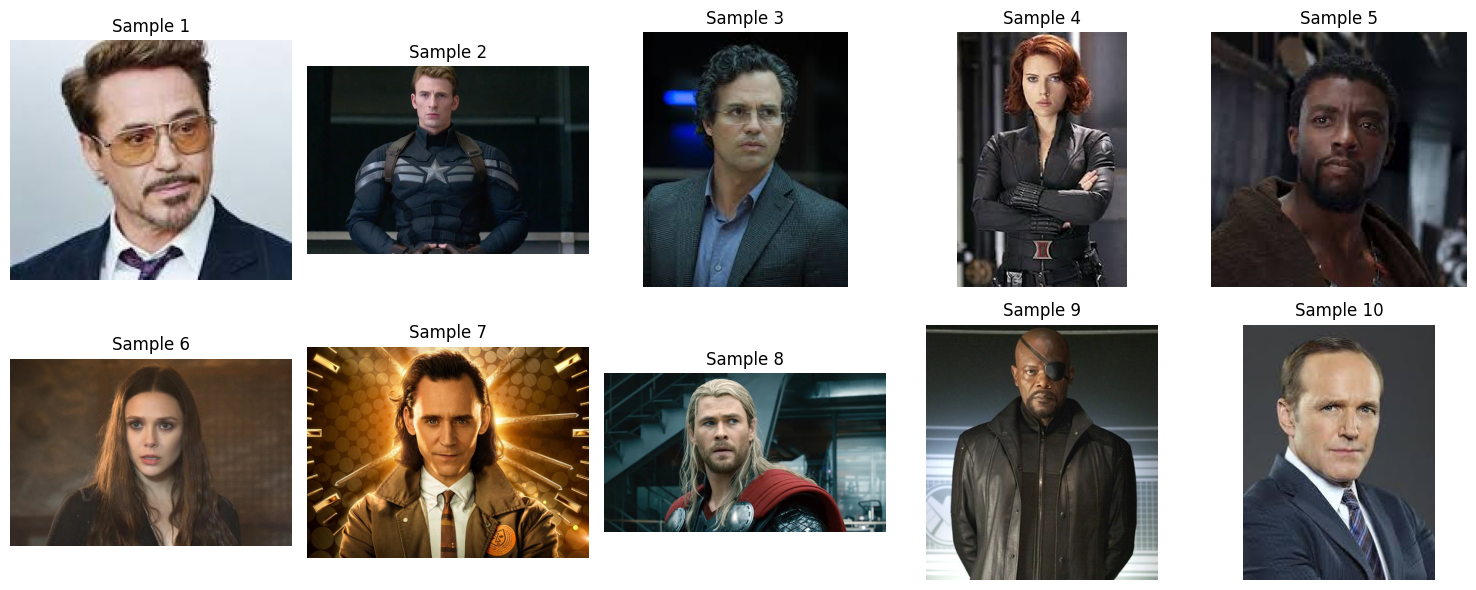


🔍 Comparing test image with sample dataset...
✅ Compared with img1 (6).jpeg: distance = 0.7916
✅ Compared with img2 (6).jpg: distance = 1.3845
✅ Compared with img3 (7).jpeg: distance = 1.0763
✅ Compared with img4 (1).jpeg: distance = 1.2610
✅ Compared with img5 (6).jpeg: distance = 1.1875
✅ Compared with img6 (6).webp: distance = 1.3541
✅ Compared with img7 (6).webp: distance = 1.1928
✅ Compared with img8 (6).webp: distance = 1.3386
✅ Compared with img9 (6).jpg: distance = 1.3174
✅ Compared with img10 (6).jpeg: distance = 1.4097

🎯 Best match: img1 (6).jpeg with distance 0.7916


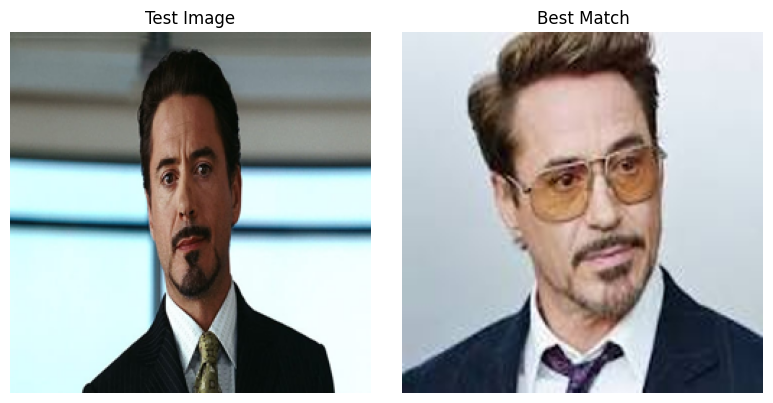

In [7]:
# Disable GPU to avoid Conv2D errors
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

!pip install deepface pillow-avif-plugin
from google.colab import files

print(" Upload 10 sample face images")
sample_files = files.upload()

sample_dir = "sample_faces"
os.makedirs(sample_dir, exist_ok=True)

sample_paths = []
for filename, filedata in sample_files.items():
    path = os.path.join(sample_dir, filename)
    with open(path, 'wb') as f:
        f.write(filedata)
    sample_paths.append(path)

print("🖼️ Upload test face image")
test_file = files.upload()
test_image_path = list(test_file.keys())[0]

import matplotlib.pyplot as plt
from PIL import Image
import math

def display_sample_images(image_paths):
    n = len(image_paths)
    cols = 5
    rows = math.ceil(n / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axs = axs.flatten()

    for i, img_path in enumerate(image_paths):
        img = Image.open(img_path).convert('RGB')
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(f"Sample {i+1}")


    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

display_sample_images(sample_paths)

from deepface import DeepFace

print("\n Comparing test image with sample dataset...")

min_distance = float('inf')
best_match = None
best_result = None

for sample_path in sample_paths:
    try:
        result = DeepFace.verify(
            img1_path=test_image_path,
            img2_path=sample_path,
            model_name="Facenet",
            distance_metric="euclidean_l2",
            enforce_detection=True
        )
        distance = result["distance"]
        print(f" Compared with {os.path.basename(sample_path)}: distance = {distance:.4f}")

        if distance < min_distance:
            min_distance = distance
            best_match = sample_path
            best_result = result

    except Exception as e:
        print(f" Error comparing {os.path.basename(sample_path)}: {e}")


if best_match:
    print(f"\n Best match: {os.path.basename(best_match)} with distance {min_distance:.4f}")

    img_test = Image.open(test_image_path).resize((250, 250))
    img_best = Image.open(best_match).resize((250, 250))

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    axs[0].imshow(img_test)
    axs[0].axis('off')
    axs[0].set_title("Test Image")

    axs[1].imshow(img_best)
    axs[1].axis('off')
    axs[1].set_title("Best Match")

    plt.tight_layout()
    plt.show()
else:
    print(" No valid matches found.")